# Short Assignment 3 - Solutions

## Problem 1

**Consider the two classes represented by Gaussians distributions P1 and P2 in Figures 1 and 2. Calculate Fisher's univariate separation indices to answer the following questions.**

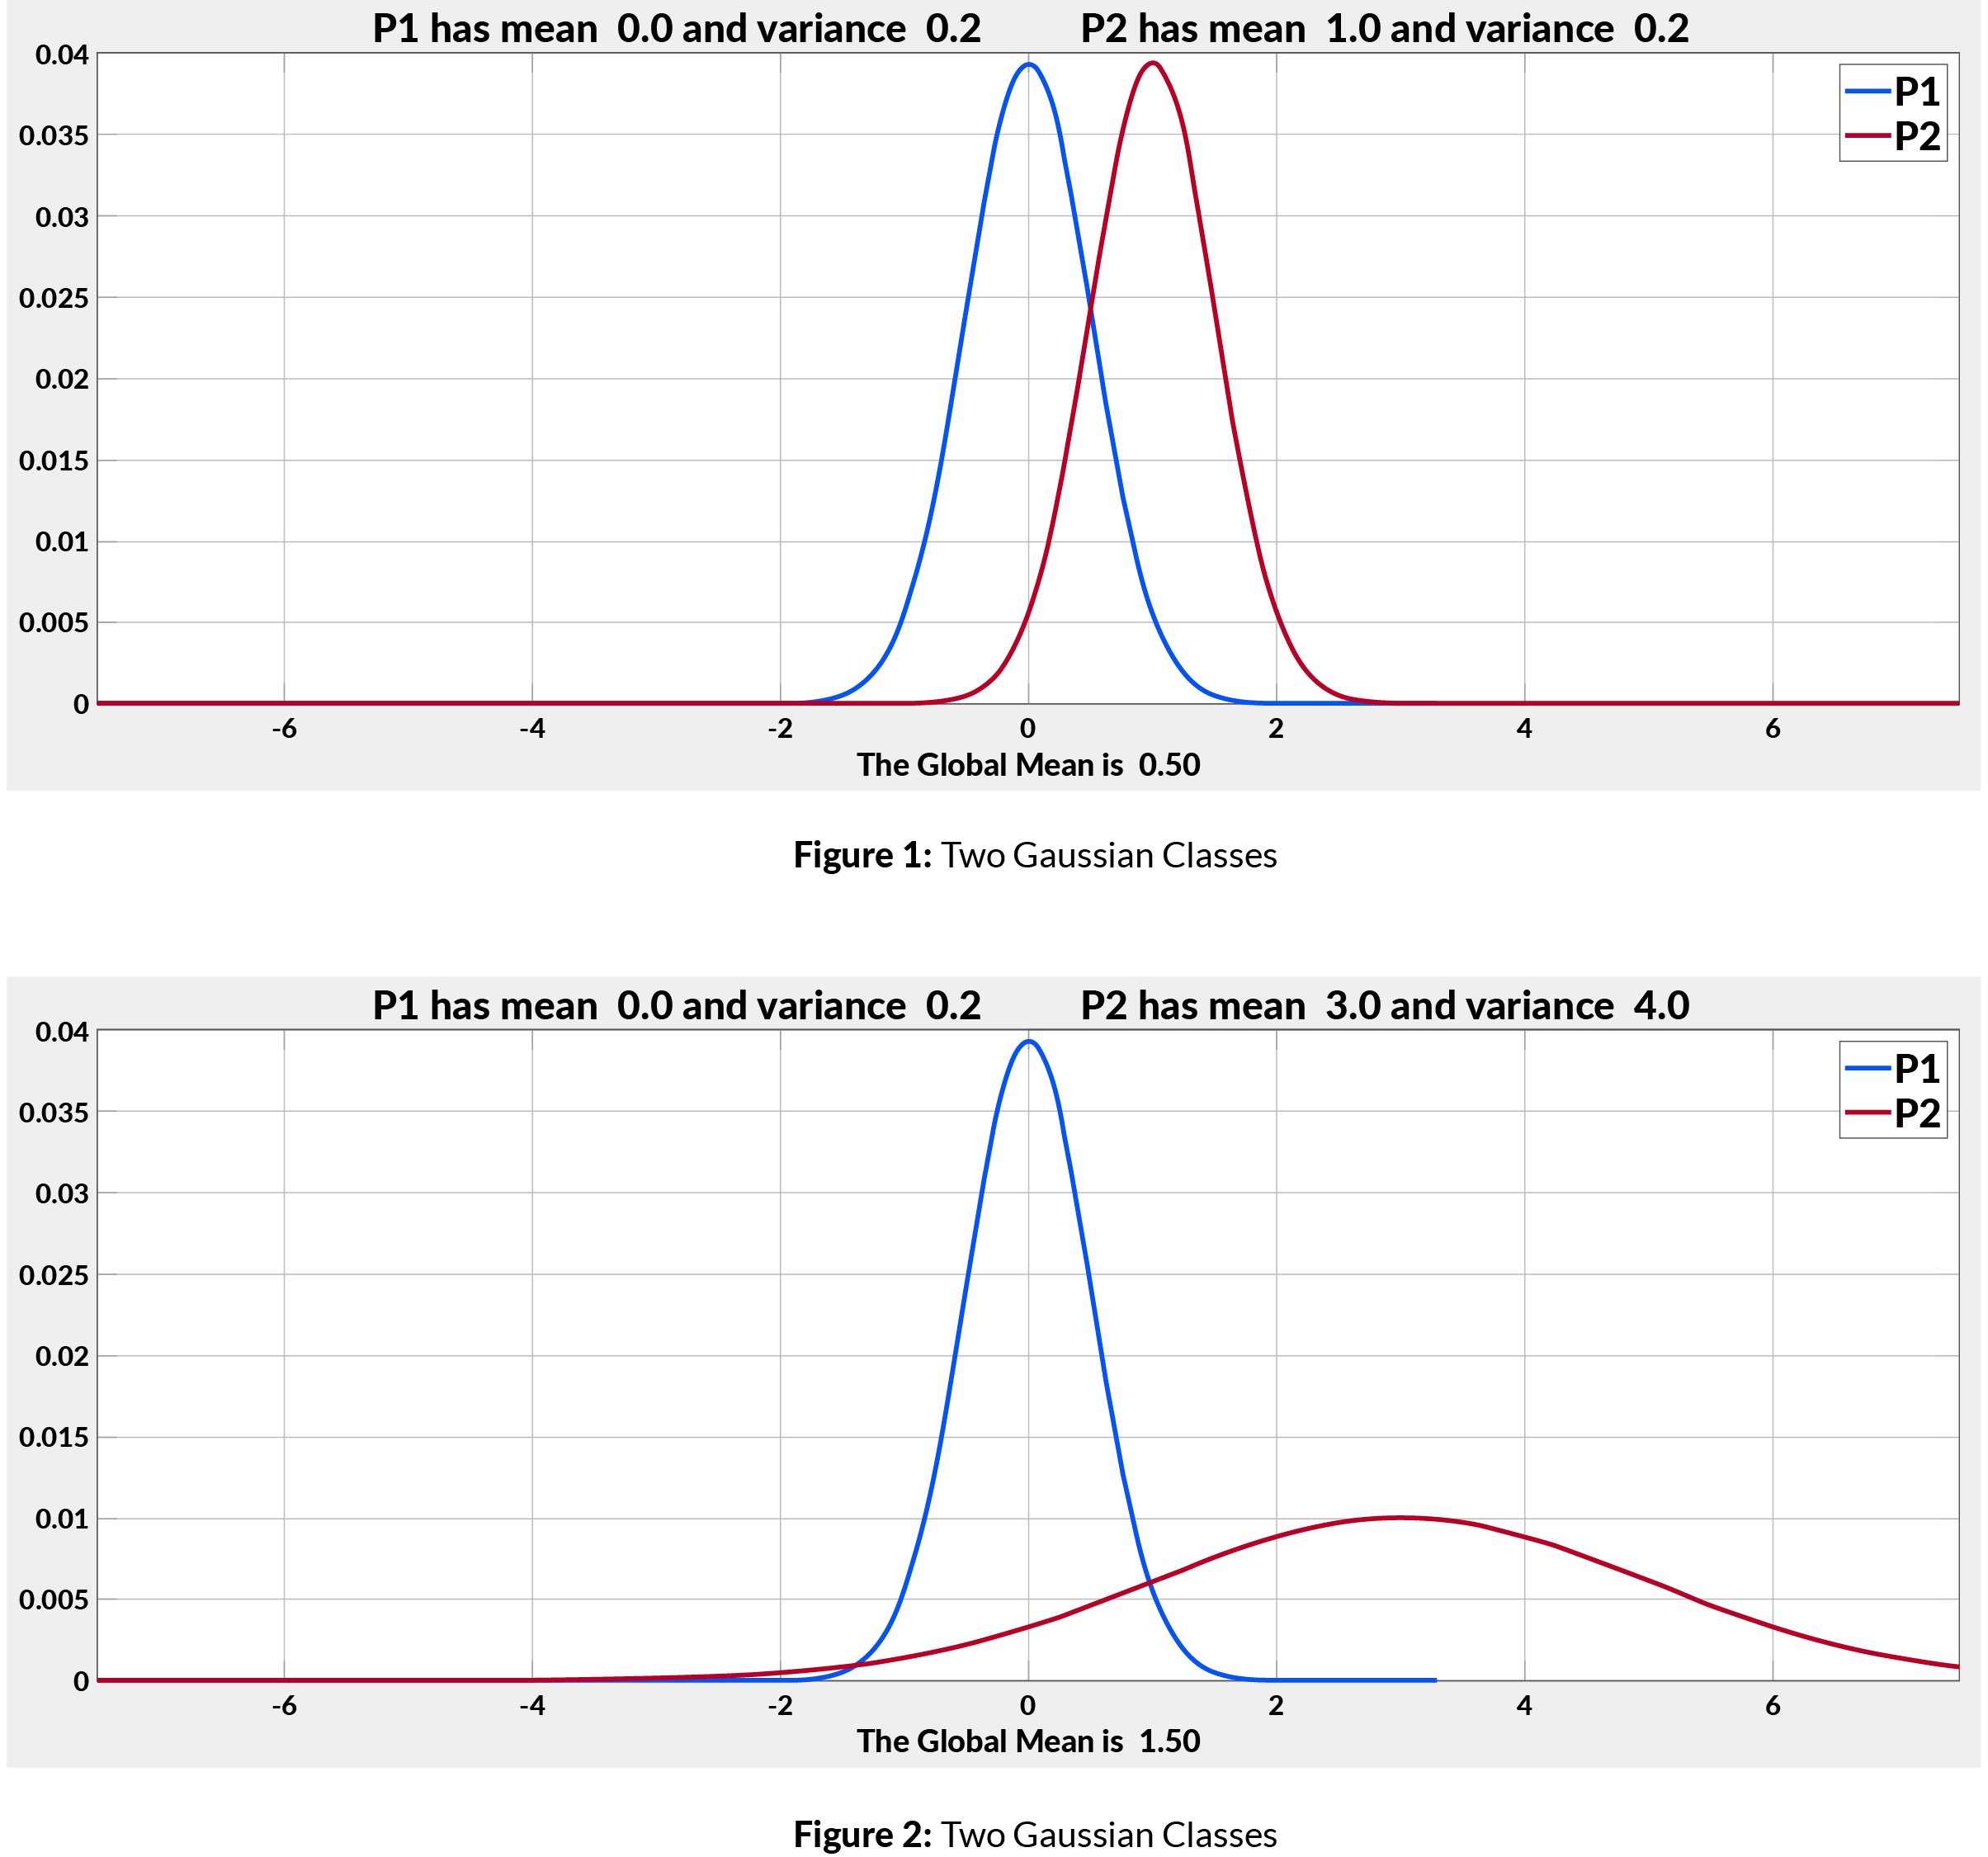

In [2]:
from IPython.display import Image
Image('figures/two-gaussian-distributions.png',width=500)

1. **What is the Within-Class Separation in Figure 1?**
2. **What is the Within-Class Separation in Figure 2?**
3. **What is the Between-Class Separation in Figure 1?**
4. **What is the Between-Class Separation in Figure 2?**
5. **Which Distributions are more separated: (A) P1,P2 in Figure 1 or (B) P1,P2 in Figure 2?**

Fisher linear discriminant is defined as 

\begin{align*}
J = \frac{(m_1-m_2)^2}{\sigma_1^2+\sigma_2^2}
\end{align*}

where the numerator represents the between-class separation and the denominator the within-class separation, for two distributions with means $m_1$ and $m_2$ and variances $\sigma_1^2$ and $\sigma_2^2$, respectively.

1. The within-class separation in figure 1 is: $\sigma_1^2 + \sigma_2^2 = 0.2 + 0.2 = 0.4$.

2. The within-class separation in figure 2 is: $\sigma_1^2 + \sigma_2^2 = 0.2 + 4.0 = 4.2$.

3. The between-class separation in figure 1 is: $(m_1-m_2)^2 = (0-1)^2 = 1$.

4. The between-class separation in figure 2 is: $(m_1-m_2)^2 = (0-3)^2 = 9$.

5. The discriminant function for figure 1 is: $J_1 = \frac{1}{0.4} = 2.5$. The discriminant function for figure 2 is: $J_2 = \frac{9}{4.2} \approx 2.143$. Since $J_1$ is maximize, we conclude that the distributions in figure 1 are (slightly) more separated.

---

## Problem 2

**Consider the following perceptron:**

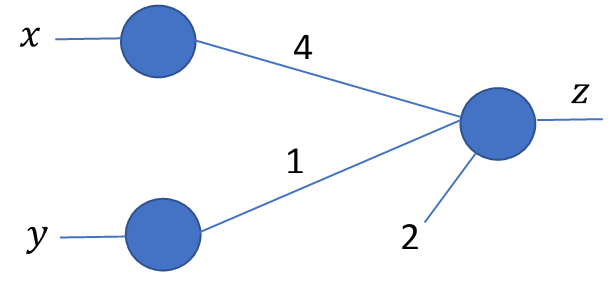

In [3]:
Image('figures/Perceptron.png', width=400)

**Recall that the perceptron uses the activation function:**

\begin{align*}
\phi(x)=\begin{cases}-1 & x\leq 0 \\ 1 & x>0\end{cases}
\end{align*}

**And the cost function is:**

\begin{align*}
E_p(\mathbf{w},b) = -\sum_{m\in\mathcal{M}}(\mathbf{w}^T\mathbf{x}_n + b)^T t_n
\end{align*}

**where  is the set of all misclassified points. The update equations for the weights and bias term are:**

\begin{align*}
\mathbf{w}^{(t+1)} &\leftarrow & \mathbf{w}^{(t)} - \eta \frac{\partial E_p(\mathbf{w},b)}{\partial \mathbf{w}} = \mathbf{w}^{(t)} + \eta \mathbf{x}_n t_n\\
b^{(t+1)} &\leftarrow & b^{(t)} - \eta\frac{\partial E_p(\mathbf{w},b)}{\partial b} = b^{(t)} + \eta t_n
\end{align*}

**Suppose you have the following 5 data samples $(x,y)$ and their corresponding labels $t$:**

\begin{align*}
(x_1,y_1)=(1,0)\text{ with }t_1&=1\\
(x_2,y_2)=(4,2)\text{ with }t_2&=1\\
(x_3,y_3)=(0,-1)\text{ with }t_3&=-1\\
(x_4,y_4)=(-1,-1)\text{ with }t_4&=-1\\
(x_5,y_5)=(-2,1)\text{ with }t_5&=-1
\end{align*}

**What is the smallest value for the learning rate $\eta$ such that the updated network will result in zero misclassified points using only one iteration?**

As the Perceptron algorithm uses misclassified points to make updates in its parameters (weights and bias), the first step is to identify if there are any misclassified points. 

Note that the Perceptron create the following decision boundary: 

\begin{align*}
z &= \phi(v), \text{ where } v = 4x + y + 2
\end{align*}

where the activation function $\phi(x) = \begin{cases}1, & x>0 \\ -1, & x\leq 0\end{cases}$.

Let's evaluate the output for each of the 5 data samples provided:

| x | y | z | t | 
|---|---|---|---|
| 1 | 0 | 1 | 1 |
| 4 | 2 | 1 | 1 |
| 0 | -1| 1 | -1|
| -1| -1| -1| -1|
| -2| 1 | -1| -1|

We can see that data sample $(x_3,y_3)=(0,-1)$ is misclassified. So this will be the only point that will be used to make the updates for the weights and bias term of the Perceptron.

The update equations are given as:

\begin{align*}
\mathbf{w}^{(t+1)} &= \mathbf{w}^{(t)} + \eta \mathbf{x}_n t_n = \begin{bmatrix}4\\1\end{bmatrix} + \eta \begin{bmatrix}0\\-1\end{bmatrix} (-1) = \begin{bmatrix}4\\1+\eta\end{bmatrix}\\
b^{(t+1)} &= b^{(t)} + \eta t_n = 2 + \eta (-1) = 2-\eta
\end{align*}

The new equation for the decision surface is:

\begin{align*}
z &= \phi(v), \text{ where } v = 4x + (1+\eta)y + 2 - \eta
\end{align*}

Putting it all together for the misclassified point, we now have:

\begin{align*}
v &= \mathbf{w}^{(t+1)^T}\begin{bmatrix}0\\-1\end{bmatrix} + b^{(t+1)}\\
&= [4, 1+\eta] \begin{bmatrix}0\\-1\end{bmatrix} + 2-\eta\\
&=-1 -\eta + 2 - \eta\\
&= 1 -2\eta
\end{align*}

Now, note that, from the activation function we are using, the point $[0,-1]$ will be classified with label $-1$ if $v\leq 0$, hence:

\begin{align*}
1 -2\eta \leq 0 \iff \eta \geq 0.5
\end{align*}

The smallest value for the learning rate such that the updated network will result in zero misclassified points using only one iteration is $\eta=0.5$. 

Check: 

\begin{align*}
\eta=0.5: z &= \phi(v), \text{ where } v = 4x + 1.5y + 1.5
\end{align*}

| x | y | v | z | t | 
|---|---|---|---|---|
| 1 | 0 |5.5| 1 | 1 |
| 4 | 2 |20.5| 1 | 1 |
| 0 | -1| 0 | -1 | -1|
| -1| -1| -4| -1| -1|
| -2| 1 | -5| -1| -1|

---